In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
mall_df.drop('CustomerID', axis = 1, inplace = True)
mall_df.replace({'Genre': {'Male': 0, 'Female': 1}}, inplace=True)
mall_df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [80]:
# numeric_cols = ['Genre', 'Age','Annual Income (k$)','Spending Score (1-100)']
# from sklearn.preprocessing import MinMaxScaler
# mall_df[numeric_cols] = MinMaxScaler().fit_transform(mall_df[numeric_cols])
# mall_df.describe()

In [81]:
mall = mall_df.iloc[:,:].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(mall)
    wcss.append(model.inertia_)

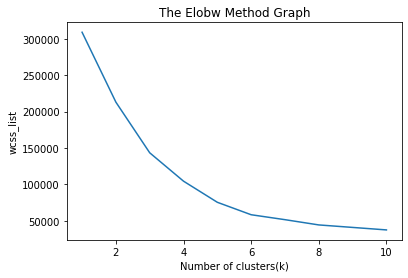

In [82]:
plt.plot(range(1,11), wcss)
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list') 
plt.show()

In [83]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
predictions = model.fit_predict(mall)
predictions

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [84]:
from sklearn.metrics import silhouette_score
score = silhouette_score(mall, model.labels_, metric='euclidean')
score

0.44424291275274114

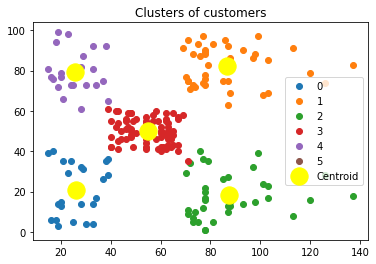

In [85]:
for i in range(0,6):
    plt.scatter(mall[predictions == i , 2] , mall[predictions == i , 3] , label = i)
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')    
plt.legend()  
plt.show()  

In [86]:
mall_df['cluster'] = predictions
mall_df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,2
197,0,32,126,74,1
198,0,32,137,18,2
